# hw 6
### due March 23, 12:30 pm
### data: `beauty.csv` or `beauty.xlsx`

We are going to sample again from the `beauty` script data.

## Q1

- **Load** the dataset
- **Calculate** the proportion of lines `BELLE` has in the script, meaning the number of rows for which `person == BELLE`
- **Store** this value as an object called `p`. Excel users: just put it in a cell with a header.

In [1]:
import pandas as pd

In [2]:
d = pd.read_csv('https://github.com/brendanrbrown/stor155_sp21/raw/main/data/beauty.csv')

In [3]:
p = d.person.value_counts(normalize = True).loc['BELLE']

In [4]:
p

0.19655667144906744

## Q2

- **Generate** 50 random samples with replacement of size 20 rows
- **For each sample, calculate** the following saving the output as a variable, one row of the variable for each sample:
    - `first_belle`: the first element of your sample representing a line Belle spoke. If none, this should be #N/A in excel and NA (or equivalent) in python
    - `n_belle`: the number of Belle's lines in your sample
    
#### Help for Excel:

Excel users will need to do this without the various add-ons excel provides. You will need to create a sample of size 1000, like we did last time. Then, you will treat each consecutive set of 20 rows as its own sample for calculating the values above. I suggest using the INDIRECT function and will demonstrate this in class.

#### Help for Python:
You can do this essentially the same way you did sampling last time. The only difference is you will now need to use something like a loop to do it consecutively. I will demonstrate this in class.

In [5]:
# here I use a list comprehension to loop. see the pandas cookbook
# in this case we just take 2 samples of size 10
[d.person.sample(10, replace = True) for i in range(2)]

[353       LUMIERE
 521    MRS. POTTS
 159       MAURICE
 543         BEAST
 153       MAURICE
 137       LUMIERE
 491         BEAST
 670         BEAST
 445         BELLE
 396          CHIP
 Name: person, dtype: object,
 156       LUMIERE
 106         BELLE
 469         BELLE
 687     COGSWORTH
 509         BELLE
 253         BELLE
 228       MAURICE
 341    MRS. POTTS
 9           BELLE
 65        WOMAN 3
 Name: person, dtype: object]

In [6]:
# reset_index is so that it forgets the original row number. see why we do this in the next step
ds = [d.person.sample(20, replace = True).reset_index(drop = True) for i in range(50)]

In [7]:
# returns first index where value is BELLE
# Remember: indexing starts at 0!
ds[0].loc[ds[0] == "BELLE"].index[0], ds[0]

(0,
 0          BELLE
 1        WOMAN 3
 2        MAURICE
 3          BELLE
 4          BELLE
 5          BELLE
 6           CHIP
 7      COGSWORTH
 8          BELLE
 9       WRESTLER
 10           ALL
 11       MAURICE
 12         BELLE
 13    MRS. POTTS
 14       OBJECTS
 15       MAURICE
 16     COGSWORTH
 17        GASTON
 18         BELLE
 19     COGSWORTH
 Name: person, dtype: object)

In [8]:
# but what about times when there is no Belle?

def check_belle(x):
    try:
        return x.loc[x == "BELLE"].index[0] + 1
    except IndexError:
        return pd.NA

In [9]:
check_belle(ds[0])

1

In [10]:
# get what you need with a list comprehension again
# x is a placeholder for elements in your list of samples

# using dtype = "Int64" to enforce integer variable type
# in cases where there are too many NA, pd.DataFrame can't recognize it as an integer
# notice I am not using the python-standard int type
# this is a kind of annoying minor technical issue with missing value types for NA
# https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html


d = pd.DataFrame([[check_belle(x), x.eq("BELLE").sum()] for x in ds], 
                 columns = ['first_belle', 'n_belle'],
                 dtype = "Int64")
d.dtypes

first_belle    Int64
n_belle        Int64
dtype: object

## Q3

- **Write one or two sentences** using formulas and concepts from class stating what distribution is appropriate for the variables `first_belle` and `n_belle` respectively.

#### Answer
The geometric(p) distribution (with `p` the true proportion of `BELLE` lines) is appropriate for `first_belle` since this variable represents the first time in a sequence of independent bernoulli trials with probability `p` that we see a success (`BELLE` line selected). A minor technical wrinkle here is the fact that we don't actually continue sampling until we do see `BELLE` --- we stop at 20 and mark NA if we haven't seen one of her lines yet. I did this for your convenience and in practice it shouldn't matter because we are very likely to see at least one success in 20 tries here.

The binomial(20, p) distribution is appropriate for `n_belle` because it counts the number of successes in 20 independent bernoulli trials.

## Q4

- **Display a histogram** of `first_belle`, using your best judgement on binwidths etc. as before

<AxesSubplot:ylabel='Frequency'>

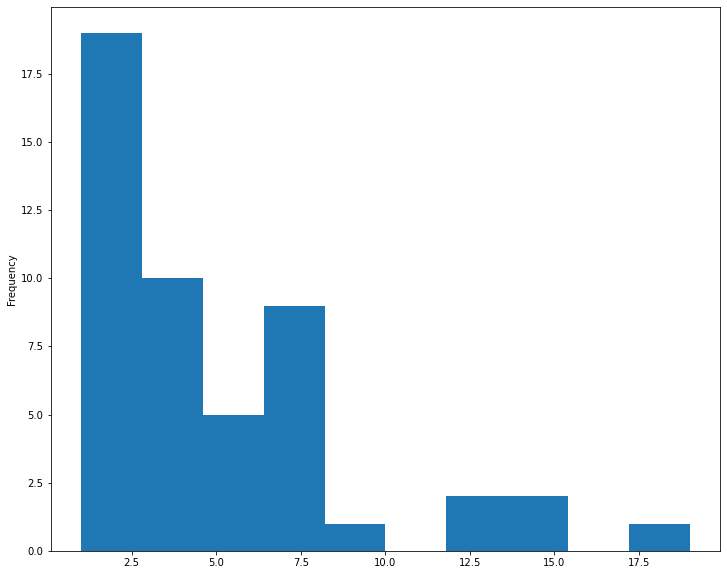

In [11]:
d.first_belle.plot.hist(figsize = (12, 10))

## Q5

- **Calculate** the average values of both `first_belle` and `n_belle`, ignoring all missing values if any.
- **Write one or two sentences** using formulas and concepts from class to explain why these calculated values do or do not make sense.

In [12]:
d.mean()

first_belle    5.00
n_belle        3.96
dtype: float64

In [13]:
f'True p: {p.round(3)}'

'True p: 0.197'

The expectation for a geometric(p) is $1/p$ which is approximately 5. The expectation for a binomial(N, p) is $N\times p$ which in this case is 4. Those theoretical numbers are close-ish to the numbers we calculated in our sample, which makes sense given the rough instruction you've had about sample and population averages so far in class.